# Importing Libraries

In [57]:
import pandas as pd
import re
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import warnings
import spacy
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

# Importing Data

In [58]:
df = pd.read_csv('comments.csv')

In [59]:
df.head()

,team_name,video_id,comment_1,comment_2,comment_3,comment_4,comment_5,comment_6,comment_7,comment_8,...,comment_21,comment_22,comment_23,comment_24,comment_25,comment_26,comment_27,comment_28,comment_29,comment_30
0,Chelsea,xY4Wgd2OyG4,01:24 look at Kante's run. Playing like a numb...,"Kante's always been a star man. We, Liverpool,...",the man we missed so much! NGOLO KANTE!!!!!,Kante was out for almost half a year and on hi...,Should’ve won. We can’t finish. Imagine this t...,"story of our season, decent performance but no...",It is hard to believe that Kante was out for s...,"Impressed with the midfield three: Kova, Kante...",...,I'm so happy to see Kante back.,Kante always giving his his,what a performance from kante despite being ou...,"I'm here to watch Kante. He is back, but Chels...",put the ball into the net!,"If we play like this, I think we need Timmo as...",gotta admit... Kante really has a great impact...,Imagine this team next season with nkunku,Kante\nWhat a perfomance,N'golo Kante played extremely well. Goes to sh...
1,Chelsea,mBewRJ9CASE,Tuchel with the 10 pts in the first league mat...,Not a Chelsea fan but it was nice to see ngolo...,What an assist by Cucurella!,had no patience with Tuchel ❌\npatience with P...,I was in favour of us hiring Potter (though di...,Definitely Dibu the player of the match! Chels...,What an assist from Cucurella and what a chip ...,Mudryk finishing and ball control in the last ...,...,Am not a Chelsea fan but its good to see kante...,whenever i feel sad i watch chels matches for ...,Cucurella's header is the best assist I've see...,I don't think the manager is the problem when ...,What an assist from the Spanish guy,Good to see Kante back,Quality assist by Cucurella for the first goal,We just need a finisher cause the amount of ch...,Would say we’re inconsistent but we’re consist...,People should start to know that the problem i...
2,Chelsea,CokI98aEmeU,We must shift our attention to the massive gam...,We lost this game but I love Chelsea Women tea...,The back position needs some change and people...,"When against Lyon, we were the lucky one. On t...",Time to bounce back blues,I know Emma has been trying to replace Magda; ...,No Reiten..No win..,Better days are coming iron lions 🦁,...,Sayang sekali kalah dari city,I can't believe,Line Up\n\nManchester City WFC\n\nE. Roebuck 1...,Over reliance on kerr,That's so strange,Poqfie,Too bad to my Chelsea women team,ор,"Chelsea really poor, Hayes making the excuse t...",First
3,Chelsea,XzCoVvz8RDA,Chelsea women never disappoints and always mak...,"0:21 that nutmeg from Cuthbert is disgusting, ...",I love Chelsea Women⚽. Proud of them. Great pe...,This is the most beautiful goal I've ever seen...,Chelsea Women are not just winning football ma...,What a performance,"0:20 Erin - fighter, skiller and playmaker",What a goal🤘,...,Great game,Congrats,Defence was not good enough tbh Good result th...,NaN,Good job ladies,❤❤❤,Guro Reiten is so master class player for me.🥰🤗,❤,CHËALSËA \n,Fan Chelsea from Vietnam
4,Chelsea,ONS2urrUe6Q,Proud of my team Chelsea ⚽,Abdullina happy to see my favorite player fina...,Such a great performance for Alsu,Reiten needs to be deployed as a no 10 more of...,Guro Reiten is becoming my favorite,Brilliant display by our Blues Team,Bravo Our Beautiful Chelsea Ladies.🥰🤗,our third goal was very satisfying to watch! l...,...,NaN,Line Up\n\nReading F.C. Women\n\nG. Moloney 1 ...,✨✨✨,Love from puerto rico,❤❤,If the men cannot make us the women make us pr...,Come on blue KTBFFH,Better than males team..,Can we swap coaches with our female team??!,My pride and joy❤❤❤❤\n\nPotter and the lads ne...


# Data Preprocessing

In [60]:
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Join the tokens back into a string
    text = ' '.join(tokens)

    return text


# Sentiment Analysis

In [61]:
def get_sentiment_polarity(comment):

    comment = str(comment)

    clean_comment = clean_text(comment)
    
    # Perform sentiment analysis using VADER
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(clean_comment)
    
    return scores["compound"]

for i in range(1, len(df.columns) - 1):
    col_name = f"comment_{i}"
    df[col_name] = df[col_name].apply(get_sentiment_polarity)

# Calculate the mean sentiment polarity for each video
df["mean_sentiment_polarity"] = df.iloc[:, 1:].mean(axis=1)

In [62]:
df.head()

,team_name,video_id,comment_1,comment_2,comment_3,comment_4,comment_5,comment_6,comment_7,comment_8,...,comment_22,comment_23,comment_24,comment_25,comment_26,comment_27,comment_28,comment_29,comment_30,mean_sentiment_polarity
0,Chelsea,xY4Wgd2OyG4,0.9062,0.3724,-0.2960,0.8910,0.4404,0.0000,-0.1027,0.8807,...,0.3400,0.0000,0.4404,0.0000,0.7430,0.8736,0.0000,0.0000,0.5563,0.302717
1,Chelsea,mBewRJ9CASE,0.4939,0.6249,0.0000,0.0000,0.6962,0.4019,0.5719,0.2732,...,0.2500,0.6369,0.8249,0.0000,0.4404,0.0000,0.0240,-0.3818,-0.5346,0.251687
2,Chelsea,CokI98aEmeU,0.0000,0.4404,-0.1630,-0.0772,0.0000,0.0000,0.5859,0.4404,...,0.0000,0.0000,0.0000,-0.2023,0.0000,-0.5423,0.0000,-0.7506,0.0000,0.013053
3,Chelsea,XzCoVvz8RDA,0.6467,-0.1280,0.9081,0.7506,0.9260,0.0000,0.1531,0.0000,...,0.5267,0.7351,0.0000,0.4404,0.0000,0.0000,0.0000,0.0000,0.3182,0.404563
4,Chelsea,ONS2urrUe6Q,0.4767,0.8979,0.6249,0.0000,0.4588,0.5859,0.5994,0.8020,...,0.4404,0.0000,0.6369,0.0000,0.4767,0.0000,0.4404,0.0000,0.3400,0.315797


# Mean Sentiment Polarity of each team

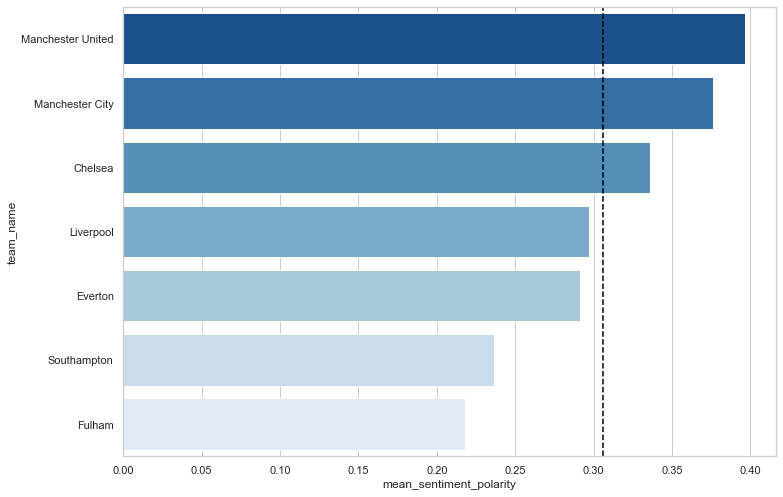

In [63]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
ax = sns.barplot(x="mean_sentiment_polarity", y="team_name", data=df, order=df.groupby('team_name').mean().sort_values('mean_sentiment_polarity', ascending=False).index, ci=None, palette="Blues_r")
ax.axvline(df["mean_sentiment_polarity"].mean(), color='black', linestyle='--')
plt.show()

In [64]:
df.to_csv('comments_sentiment.csv', index=False)

# Named Entity Recognition (NER)

In [65]:
df = pd.read_csv('comments.csv')

def perform_ner(df):
    nlp = spacy.load('en_core_web_sm')
    
    # Create an empty list to store NER results
    ner_results = []
    
    # Iterate over each row (video) in the DataFrame
    for i, row in df.iterrows():
        video_comments = ' '.join([str(row[c]) for c in df.columns if c.startswith('comment_')])
        doc = nlp(video_comments)
        
        # Extract named entities from the document
        ner_text = [(ent.text, ent.label_) for ent in doc.ents]
        
        # Add NER results to the list
        ner_results.append(ner_text)
        
    # Add a new column to the DataFrame with the NER results
    df['ner_results'] = ner_results

    # Get the most common word for each video
    most_common_words = []
    for ner_text in ner_results:
        words = [w[0].lower() for w in ner_text]
        counter = Counter(words)
        if counter:
            # most_common_word = counter.most_common(1)[0][0] 
            most_common_word = [w[0] for w in counter.most_common(5)]
        else:
            most_common_word = ''
        most_common_words.append(most_common_word)
    
    # Add a new column to the DataFrame with the most common word
    df['most_common_words'] = most_common_words
    
    return df

df = perform_ner(df)

df.head(2)

,team_name,video_id,comment_1,comment_2,comment_3,comment_4,comment_5,comment_6,comment_7,comment_8,...,comment_23,comment_24,comment_25,comment_26,comment_27,comment_28,comment_29,comment_30,ner_results,most_common_words
0,Chelsea,xY4Wgd2OyG4,01:24 look at Kante's run. Playing like a numb...,"Kante's always been a star man. We, Liverpool,...",the man we missed so much! NGOLO KANTE!!!!!,Kante was out for almost half a year and on hi...,Should’ve won. We can’t finish. Imagine this t...,"story of our season, decent performance but no...",It is hard to believe that Kante was out for s...,"Impressed with the midfield three: Kova, Kante...",...,what a performance from kante despite being ou...,"I'm here to watch Kante. He is back, but Chels...",put the ball into the net!,"If we play like this, I think we need Timmo as...",gotta admit... Kante really has a great impact...,Imagine this team next season with nkunku,Kante\nWhat a perfomance,N'golo Kante played extremely well. Goes to sh...,"[(Kante, GPE), (9, CARDINAL), (Konate, ORG), (...","[kante, chelsea, 9, kova, champions league]"
1,Chelsea,mBewRJ9CASE,Tuchel with the 10 pts in the first league mat...,Not a Chelsea fan but it was nice to see ngolo...,What an assist by Cucurella!,had no patience with Tuchel ❌\npatience with P...,I was in favour of us hiring Potter (though di...,Definitely Dibu the player of the match! Chels...,What an assist from Cucurella and what a chip ...,Mudryk finishing and ball control in the last ...,...,Cucurella's header is the best assist I've see...,I don't think the manager is the problem when ...,What an assist from the Spanish guy,Good to see Kante back,Quality assist by Cucurella for the first goal,We just need a finisher cause the amount of ch...,Would say we’re inconsistent but we’re consist...,People should start to know that the problem i...,"[(10, CARDINAL), (first, ORDINAL), (Chelsea, O...","[chelsea, first, cucurella, kante, todd boehly]"


# Influential Players

In [66]:
ner_results = df.ner_results.values.tolist()
ner_results = [item for sublist in ner_results for item in sublist] # exploded list, unpacked all data
person_names = [name[0] for name in ner_results if name[1] == 'PERSON']
person_names = [name for name in person_names if len(name.split()) == 1]
person_names = [name for name in person_names if name not in df.team_name.values.tolist()]
# most common names
Counter(person_names).most_common(15)

[('Alvarez', 44),
 ('Klopp', 36),
 ('Rashford', 36),
 ('Brighton', 26),
 ('Solomon', 26),
 ('Salah', 19),
 ('Foden', 17),
 ('Mane', 17),
 ('Cancelo', 16),
 ('Jota', 16),
 ('Darwin', 16),
 ('Bruno', 15),
 ('Allison', 14),
 ('Leeds', 13),
 ('Fred', 13)]

# Most Occuring Words

In [67]:
teams = df.groupby('team_name').most_common_words.apply(lambda x: x.sum())
words_l = []
teams_l = []

words_to_extract = 10

for team, team_array in teams.items():
    words = Counter(team_array).most_common(words_to_extract)
    words = tuple([f'{w[0]} - {w[1]}' for w in words])
    print(f'{team}: {words}')
    words_l.extend(words)
    teams_l.extend([team] * words_to_extract)

Chelsea: ('chelsea - 16', 'first - 6', 'potter - 3', 'mudryk - 3', 'james - 3', '2 - 3', 'kante - 2', 'cucurella - 2', 'gk - 2', 'sam kerr - 2')
Everton: ('everton - 20', 'today - 5', 'this season - 5', 'dyche - 4', 'first - 4', 'iwobi - 4', '3 - 3', 'second - 3', 'the season - 2', '1 - 2')
Fulham: ('fulham - 18', 'solomon - 5', 'willian - 5', 'mitrovic - 4', 'manor solomon - 3', 'mitro - 3', 'europe - 2', 'today - 2', '5 - 2', '1 - 2')
Liverpool: ('liverpool - 17', 'salah - 10', 'this season - 7', 'nunez - 7', 'klopp - 5', 'first - 5', 'gakpo - 4', 'alisson - 2', 'jota - 2', 'elliot - 2')
Manchester City: ('haaland - 17', 'alvarez - 5', 'two - 5', 'kdb - 5', 'de bruyne - 4', '2 - 4', 'foden - 4', 'first - 3', 'mahrez - 3', 'halaand - 2')
Manchester United: ('rashford - 10', 'casemiro - 10', 'united - 8', 'ten - 8', 'bruno - 4', 'two - 3', 'weghorst - 3', 'first - 3', 'garnacho - 3', 'antony - 2')
Southampton: ('southampton - 10', 'saints - 6', 'jones - 4', 'walcott - 3', 'today - 3', 

In [68]:
df_freq = pd.DataFrame({'team': teams_l, 'word': words_l})
df_freq['frequncy'] = df_freq.word.apply(lambda x: int(x.split('-')[1].strip()))
df_freq['word'] = df_freq.word.apply(lambda x: x.split('-')[0].strip())
df_freq = df_freq[~df_freq.word.str.lower().isin(df_freq.team.str.lower())]

In [69]:
df_freq['frequncy'].mean()

4.046153846153846

In [70]:
df_freq.head()

,team,word,frequncy
1,Chelsea,first,6
2,Chelsea,potter,3
3,Chelsea,mudryk,3
4,Chelsea,james,3
5,Chelsea,2,3


In [71]:
df_freq.to_csv('word_freq.csv', index=False)